In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [145]:
dataframes = {}
for c in ['cilia', 'nocilia']:
    for w in ['light', 'heavy']:
        dataframes[w+'-'+c] = pd.read_csv('big-'+w+'-soft-'+c+'-readings.csv')

In [146]:
dataframes['light-cilia'].head()

,norm,time,touch,x,y,z
0,-0.188291,19.0,0.0,-0.947368,1.947368,-0.052632
1,-0.188291,20.0,0.0,-0.947368,1.947368,-0.052632
2,0.027272,21.0,0.0,0.052632,0.947368,-0.052632
3,-2.920123,22.0,0.0,0.052632,0.947368,2.947368
4,-2.920123,23.0,0.0,0.052632,0.947368,2.947368


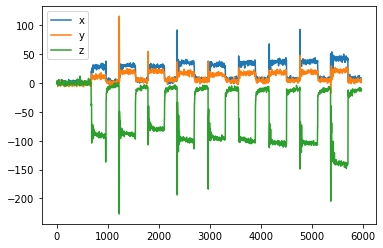

In [147]:
df_cilia = dataframes['light-cilia']
plt.plot(df_cilia['x'],label='x')
plt.plot(df_cilia['y'],label='y')
plt.plot(df_cilia['z'],label='z')
plt.legend(loc='best')
plt.savefig('xyz-cilia-light-cube.pdf')

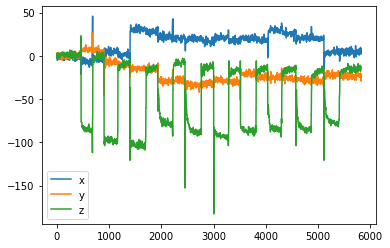

In [151]:
df_nocilia = dataframes['light-nocilia']
plt.plot(df_nocilia['x'],label='x')
plt.plot(df_nocilia['y'],label='y')
plt.plot(df_nocilia['z'],label='z')
plt.legend(loc='best')
plt.savefig('xyz-baseline-light-cube.pdf')

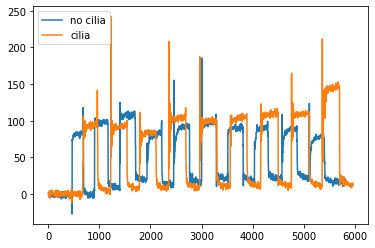

In [152]:
plt.plot(df_nocilia['norm'],label='no cilia')
plt.plot(df_cilia['norm'],label='cilia')
plt.legend(loc='best')

In [75]:
t_step = 37 / 5850
t_step

0.006324786324786325

In [98]:
frequency = int(1/t_step)
frequency 

158

## Sample readings

In [209]:
def get_samples(df, frequency, count_max = 9, verbose=True):
    touch = 0 
    samples = []
    for index, row in df.iterrows():
        # cube added?
        if row['touch'] > touch:
                touch = row['touch']
                if verbose:
                    print('added %d' % index)
                r = df.iloc[index+frequency]['norm']
                # ignore mistake
                if r < 50:
                    continue
                samples.append(r)
        # cube removed?
        if row['touch'] < touch:
                touch = row['touch']
                if verbose:
                    print('removed %d' % index)
        if len(samples) >= count_max:
            return samples
    return samples

In [210]:
samples = get_samples(dataframes['heavy-cilia'], frequency)

added 274
removed 619
added 874
removed 1204
added 1439
removed 1749
added 1849
removed 2484
added 2769
removed 3114
added 3404
removed 3724
added 4019
removed 4334
added 4614
removed 4994
added 5284
removed 5629
added 6034


In [211]:
np.mean(samples)

486.756006734144

In [212]:
np.std(samples)

47.25398446964311

In [213]:
len(samples)

9

In [214]:
samples

[456.77446065604727,
 536.1885695146897,
 464.76976744021204,
 587.4086565690087,
 455.1478928174904,
 461.2145798352492,
 524.2161470764063,
 449.7159608710174,
 445.3680258271749]

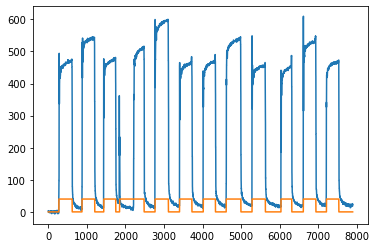

In [215]:
plt.plot(dataframes['heavy-cilia']['norm']) #[1700:2600]
plt.plot(dataframes['heavy-cilia']['touch']*40)

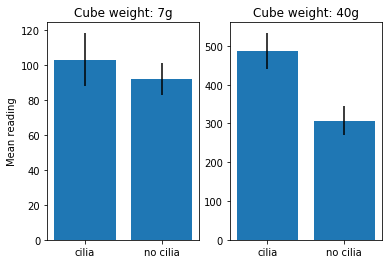

In [217]:
means = []
stds = []
names = []
for w in ['light', 'heavy']:
    for c in ['cilia', 'nocilia']:
        df = dataframes[w+'-'+c]
        samples = get_samples(df, frequency, verbose=False)
        
        means.append(np.mean(samples))
        stds.append(np.std(samples))
        names.append(w+'-'+c)
        
fig, axes = plt.subplots(1, 2, sharey=False)
for i in range(2):
    axes[i].bar(np.array([1,2]), 
           means[i*2:i*2+2],
           0.8,
           bottom=0,
           yerr=stds[i*2:i*2+2]
          )
    
    axes[i].set_xticks([1,2])
    axes[i].set_xticklabels(['cilia', 'no cilia'])
    
axes[0].set_title('Cube weight: 7g')
axes[1].set_title('Cube weight: 40g')

axes[0].set_ylabel('Mean reading')


fig.savefig('sensitivity-bars.pdf')

### ratios

In [222]:
means[2] / means[0]

4.715586109410024

In [221]:
means[3] / means[1]

3.333648027598754